# Análisis de Pedidos de Instacart

En este análisis exploratorio, se utiliza el conjunto de datos de pedidos de Instacart para responder preguntas clave sobre el comportamiento de compra de los usuarios. A través de agrupaciones, cálculos de proporciones y visualizaciones básicas, se busca identificar patrones de compra, frecuencia de productos, y hábitos de los clientes.


# Introducción

Instacart es una plataforma de entrega de comestibles que permite a los usuarios realizar pedidos en línea y recibirlos a domicilio, de forma similar a servicios como Uber Eats o DoorDash. El presente proyecto tiene como objetivo realizar un análisis exploratorio de un conjunto de datos modificado que simula la actividad de la plataforma.

El conjunto de datos ha sido ajustado intencionalmente para optimizar el procesamiento, incluyendo valores ausentes y duplicados de manera controlada, pero respetando la distribución original de los datos. A partir de esta información, se buscará identificar patrones de comportamiento de los usuarios, tendencias de consumo y características relevantes en los pedidos.

El análisis se dividirá en tres etapas principales:
1. Limpieza y preprocesamiento de datos.
2. Exploración visual y estadística.
3. Conclusiones a partir de los hallazgos obtenidos.

---

**Diccionario de datos** 

El conjunto incluye cinco archivos CSV que contienen la información relacionada con los pedidos, productos y su categorización. A continuación, se detallan sus columnas:

- **`instacart_orders.csv`**
  - `order_id`: ID único del pedido.
  - `user_id`: ID único del usuario.
  - `order_number`: Número de orden secuencial por usuario.
  - `order_dow`: Día de la semana del pedido (0 = domingo).
  - `order_hour_of_day`: Hora en que se realizó el pedido.
  - `days_since_prior_order`: Días desde el pedido anterior del mismo usuario.

- **`products.csv`**
  - `product_id`: ID único del producto.
  - `product_name`: Nombre del producto.
  - `aisle_id`: ID del pasillo al que pertenece.
  - `department_id`: ID del departamento al que pertenece.

- **`order_products.csv`**
  - `order_id`: ID del pedido.
  - `product_id`: ID del producto.
  - `add_to_cart_order`: Orden en que se agregó al carrito.
  - `reordered`: 1 si ya fue pedido anteriormente por el usuario, 0 en caso contrario.

- **`aisles.csv`**
  - `aisle_id`: ID del pasillo.
  - `aisle`: Nombre del pasillo.

- **`departments.csv`**
  - `department_id`: ID del departamento.
  - `department`: Nombre del departamento.

## Carga de datos e inspección inicial

Se realiza la importación de las librerías necesarias y la carga de los cinco archivos `.csv` provistos. Cada uno contiene información clave para el análisis: pedidos, productos, pasillos y departamentos.

Se emplean rutas relativas para garantizar la compatibilidad del proyecto en distintos entornos.

A continuación, se presenta una inspección general de cada tabla utilizando el método `.info()` para conocer el número de entradas, nombres de columnas, tipos de datos y posibles valores nulos.

In [36]:
import pandas as pd

# Cargar los archivos desde la ruta local
orders = pd.read_csv(r"D:\Datasets\instacart_orders.csv", sep=';')
products = pd.read_csv(r"D:\Datasets\products.csv", sep=';')
aisles = pd.read_csv(r"D:\Datasets\aisles.csv", sep=';')
departments = pd.read_csv(r"D:\Datasets\departments.csv", sep=';')
order_products = pd.read_csv(r"D:\Datasets\order_products.csv", sep=';')

# Inspección general de cada DataFrame
print("Información del DataFrame 'orders':")
print(orders.info())

print("\nInformación del DataFrame 'products':")
print(products.info())

print("\nInformación del DataFrame 'aisles':")
print(aisles.info())

print("\nInformación del DataFrame 'departments':")
print(departments.info())

print("\nInformación del DataFrame 'order_products':")
print(order_products.info())

Información del DataFrame 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

Información del DataFrame 'products':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3  

## Preprocesamiento de los datos

En esta sección se realiza el preprocesamiento de los datos siguiendo tres objetivos clave:

- Verificar y corregir los tipos de datos (por ejemplo, asegurarse de que los ID sean enteros).
- Identificar y tratar valores ausentes.
- Detectar y eliminar valores duplicados.

Este paso es fundamental para garantizar la calidad del análisis posterior. A continuación, se presenta el plan de solución y se desarrolla el análisis con el DataFrame `orders`.

---

### Eliminación de valores duplicados — `orders`

Primero, se evaluó si el conjunto de datos contenía filas duplicadas. Se detectaron **15 registros duplicados**, los cuales presentaban valores idénticos en todas sus columnas (`order_id`, `user_id`, `order_number`, `order_dow`, `order_hour_of_day`, `days_since_prior_order`).

Para entender mejor estos casos, se analizó un subconjunto filtrado de pedidos realizados el miércoles a las 2:00 a.m., lo que reveló **121 pedidos** realizados en ese horario. Esto sugiere que las duplicaciones podrían estar relacionadas con hábitos de compra recurrentes, pero al tratarse de duplicados exactos, se procedió con su eliminación.

Tras aplicar `drop_duplicates()`, se verificó que el número total de filas pasó de **478,967 a 478,952**. Posteriormente, se confirmó que no quedaban duplicados ni en las filas completas ni en los valores de `order_id`.

Este proceso asegura que los datos del DataFrame `orders` estén libres de duplicaciones y listos para análisis posteriores.


In [37]:
# Identificar duplicados en el DataFrame 'orders'
duplicados_orders = orders.duplicated()
print(f"Número de filas duplicadas en 'orders': {duplicados_orders.sum()}")

if duplicados_orders.any():
    print("Ejemplo de filas duplicadas:")
    print(orders[duplicados_orders])

# Verificación adicional (pedidos hechos miércoles 2 a.m.)
pedidos_miercoles_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(f"Número de pedidos realizados el miércoles a las 2:00 a.m.: {pedidos_miercoles_2am.shape[0]}")
print(pedidos_miercoles_2am)

# Eliminar duplicados
orders = orders.drop_duplicates()
print(f"Número de filas tras eliminar duplicados: {orders.shape[0]}")

# Verificar que no quedan duplicados
duplicados_orders = orders.duplicated()
print(f"Número de filas duplicadas después de limpiar: {duplicados_orders.sum()}")

# Verificar que los IDs no están duplicados
duplicados_order_ids = orders['order_id'].duplicated().sum()
print(f"Número de IDs de pedidos duplicados: {duplicados_order_ids}")

Número de filas duplicadas en 'orders': 15
Ejemplo de filas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3  

### Evaluación de duplicados — `products`

El conjunto de datos `products` fue evaluado para detectar filas duplicadas completas, así como duplicaciones dentro de columnas clave.

- **Filas completas duplicadas:** No se encontraron registros duplicados a nivel de fila.
- **IDs de departamento (`department_id`) duplicados:** Se detectaron 49,673 repeticiones. Esto es esperable, ya que múltiples productos pueden pertenecer a un mismo departamento.
- **Nombres de productos (`product_name`) duplicados:** Se identificaron 104 valores duplicados al ignorar diferencias de mayúsculas/minúsculas y omitir valores nulos.

Este análisis sugiere que no es necesario eliminar registros, ya que las duplicaciones detectadas corresponden a relaciones válidas dentro de la estructura del dataset (como varios productos bajo un mismo departamento o productos con el mismo nombre).


In [40]:
# Verificar duplicados a nivel de fila
duplicados_products = products.duplicated()
print(f"Número de filas duplicadas en 'products': {duplicados_products.sum()}")

# Verificar duplicados en department_id
duplicados_department_ids = products['department_id'].duplicated().sum()
print(f"Número de IDs de departamentos duplicados en 'products': {duplicados_department_ids}")

# Verificar duplicados en nombres de productos (ignorando mayúsculas)
duplicados_product_names = products['product_name'].str.lower().duplicated().sum()
print(f"Número de nombres duplicados de productos (ignorando mayúsculas): {duplicados_product_names}")

# Eliminar nulos antes de verificar duplicados
productos_no_faltantes = products[products['product_name'].notna()]
duplicados_productos_no_faltantes = productos_no_faltantes['product_name'].str.lower().duplicated().sum()
print(f"Número de nombres duplicados de productos no faltantes: {duplicados_productos_no_faltantes}")

Número de filas duplicadas en 'products': 0
Número de IDs de departamentos duplicados en 'products': 49673
Número de nombres duplicados de productos (ignorando mayúsculas): 1361
Número de nombres duplicados de productos no faltantes: 104


### Evaluación de duplicados — `departments`

Se verificó si existían registros duplicados completos y duplicaciones en la columna `department_id`. No se encontraron filas duplicadas ni IDs repetidos, lo que indica que la tabla `departments` está limpia y correctamente estructurada para su análisis.


In [43]:
# Verificar duplicados en el DataFrame 'departments'
departments = pd.read_csv(r"D:\Datasets\departments.csv", sep=';')

duplicados_departments = departments.duplicated()
print(f"Número de filas duplicadas en 'departments': {duplicados_departments.sum()}")

duplicados_department_ids = departments['department_id'].duplicated().sum()
print(f"Número de IDs de departamentos duplicados en 'departments': {duplicados_department_ids}")

Número de filas duplicadas en 'departments': 0
Número de IDs de departamentos duplicados en 'departments': 0


### Evaluación de duplicados — `aisles`

De manera similar, se evaluó la tabla `aisles`. No se identificaron registros duplicados ni repeticiones de `aisle_id`, lo cual confirma que la tabla contiene información única para cada pasillo y está lista para integrarse con otros DataFrames.


In [47]:
# Verificar duplicados en el DataFrame 'aisles'
aisles = pd.read_csv(r"D:\Datasets\aisles.csv", sep=';')

duplicados_aisles = aisles.duplicated()
print(f"Número de filas duplicadas en 'aisles': {duplicados_aisles.sum()}")

duplicados_aisle_ids = aisles['aisle_id'].duplicated().sum()
print(f"Número de IDs de pasillos duplicados en 'aisles': {duplicados_aisle_ids}")

Número de filas duplicadas en 'aisles': 0
Número de IDs de pasillos duplicados en 'aisles': 0


### Evaluación de duplicados — `order_products`

Se inspeccionaron posibles duplicaciones en la tabla `order_products` a nivel de filas completas y en la combinación de columnas `order_id` + `product_id`. No se identificaron duplicados en ningún caso, lo que garantiza la integridad de los registros de productos por pedido.


In [50]:
# Verificar duplicados en el DataFrame 'order_products'
order_products = pd.read_csv(r"D:\Datasets\order_products.csv", sep=';')

duplicados_order_products = order_products.duplicated()
print(f"Número de filas duplicadas en 'order_products': {duplicados_order_products.sum()}")

duplicados_combinados = order_products.duplicated(subset=['order_id', 'product_id'], keep=False)
print(f"Número de duplicados considerando 'order_id' y 'product_id': {duplicados_combinados.sum()}")

Número de filas duplicadas en 'order_products': 0
Número de duplicados considerando 'order_id' y 'product_id': 0


## Análisis y tratamiento de valores ausentes

Además de los valores duplicados, es fundamental identificar y tratar los valores ausentes para asegurar la integridad del análisis.

Se encontraron valores nulos en las siguientes columnas:

- `product_name` en el DataFrame `products`.
- `days_since_prior_order` en el DataFrame `orders`.
- `add_to_cart_order` en el DataFrame `order_products`.

A continuación, se analiza cada caso y se documentan las decisiones tomadas para manejar los datos faltantes.

---

### Valores ausentes — `products`

Se identificaron 1,258 valores ausentes en la columna `product_name` del DataFrame `products`. Al analizarlos, se observó que todos los valores faltantes pertenecen al pasillo con ID 100 y al departamento con ID 21.

Al inspeccionar la tabla `aisles`, se encontró que el pasillo con ID 100 está etiquetado como `"missing"`. De igual forma, el departamento con ID 21 también aparece como `"missing"` en la tabla `departments`. Esto sugiere que los valores ausentes fueron incluidos intencionalmente como parte de un grupo de productos sin clasificar.

Para mantener la integridad del conjunto de datos y evitar perder registros, los valores ausentes en `product_name` fueron completados con la etiqueta `"Unknown"`.


In [54]:
# Contar valores nulos en la columna 'product_name'
valores_ausentes_product_name = products['product_name'].isna().sum()
print(f"Número de valores ausentes en 'product_name': {valores_ausentes_product_name}")

# Verificar si los valores ausentes están concentrados en un pasillo específico
ausentes_pasillo_100 = products[products['product_name'].isna() & (products['aisle_id'] == 100)]
print(f"Número de valores ausentes relacionados con el pasillo con ID 100: {ausentes_pasillo_100.shape[0]}")

# Verificar si los valores ausentes están en un departamento específico
ausentes_departamento_21 = products[products['product_name'].isna() & (products['department_id'] == 21)]
print(f"Número de valores ausentes relacionados con el departamento con ID 21: {ausentes_departamento_21.shape[0]}")

# Ver detalles del pasillo y departamento
pasillo_100 = aisles[aisles['aisle_id'] == 100]
departamento_21 = departments[departments['department_id'] == 21]

print("Detalles del pasillo con ID 100:")
print(pasillo_100)

print("\nDetalles del departamento con ID 21:")
print(departamento_21)

# Rellenar los valores ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print("Valores ausentes en 'product_name' completados con 'Unknown'.")

Número de valores ausentes en 'product_name': 1258
Número de valores ausentes relacionados con el pasillo con ID 100: 1258
Número de valores ausentes relacionados con el departamento con ID 21: 1258
Detalles del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Detalles del departamento con ID 21:
    department_id department
20             21    missing
Valores ausentes en 'product_name' completados con 'Unknown'.


### Valores ausentes — `orders`

Se evaluó el DataFrame `orders` en busca de valores nulos. Se identificó que la única columna con posibles valores ausentes es `days_since_prior_order`. Esto es esperado, ya que para el primer pedido de cada usuario no puede calcularse el tiempo transcurrido desde un pedido anterior.

Se verificó que todos los valores nulos en esta columna corresponden efectivamente a registros con `order_number` igual a 1. Por tanto, no es necesario imputar ni eliminar estos valores, ya que reflejan adecuadamente la lógica del negocio.


In [58]:
# Verificar valores ausentes en 'orders'
valores_ausentes_orders = orders.isna().sum()
print("Valores ausentes por columna en 'orders':")
print(valores_ausentes_orders)

# Verificar si los nulos en 'days_since_prior_order' corresponden al primer pedido
valores_ausentes_no_primer_pedido = orders[
    orders['days_since_prior_order'].isna() & (orders['order_number'] != 1)
]
print(f"Número de valores ausentes que no corresponden al primer pedido: {valores_ausentes_no_primer_pedido.shape[0]}")

Valores ausentes por columna en 'orders':
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
Número de valores ausentes que no corresponden al primer pedido: 0


### Valores ausentes — `order_products`

En el DataFrame `order_products`, se encontraron 836 valores ausentes en la columna `add_to_cart_order`. Esta columna representa el orden en que los productos fueron añadidos al carrito, por lo que su ausencia puede dificultar el análisis secuencial.

Se revisó el rango válido de esta variable, cuyo valor mínimo es 1 y el máximo es 64. También se identificaron los IDs de pedido con valores ausentes.

Finalmente, se optó por reemplazar los valores nulos con el valor `999`, una etiqueta que indica que el orden es desconocido, sin eliminar ningún registro. Luego se convirtió la columna al tipo entero (`int`) para mantener la consistencia.


In [63]:
# Verificar valores ausentes en 'order_products'
valores_ausentes_order_products = order_products.isna().sum()
print("Valores ausentes por columna en 'order_products':")
print(valores_ausentes_order_products)

# Rango actual de 'add_to_cart_order'
min_add_to_cart_order = order_products['add_to_cart_order'].min()
max_add_to_cart_order = order_products['add_to_cart_order'].max()
print(f"Valor mínimo en 'add_to_cart_order': {min_add_to_cart_order}")
print(f"Valor máximo en 'add_to_cart_order': {max_add_to_cart_order}")

# IDs de pedidos con valores ausentes
ids_pedidos_ausentes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(f"IDs de pedidos con valores ausentes en 'add_to_cart_order': {ids_pedidos_ausentes}")

# Cantidad de productos por pedido con valores ausentes
conteo_productos_por_pedido = order_products[
    order_products['add_to_cart_order'].isna()
].groupby('order_id')['product_id'].count()

min_productos = conteo_productos_por_pedido.min()
print(f"El número mínimo de productos en pedidos con valores ausentes es: {min_productos}")

# Imputar los valores ausentes con 999 y convertir a entero
order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print("Valores ausentes en 'add_to_cart_order' reemplazados con 999 y la columna convertida a tipo entero.")

Valores ausentes por columna en 'order_products':
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
Valor mínimo en 'add_to_cart_order': 1
Valor máximo en 'add_to_cart_order': 999
IDs de pedidos con valores ausentes en 'add_to_cart_order': []
El número mínimo de productos en pedidos con valores ausentes es: nan
Valores ausentes en 'add_to_cart_order' reemplazados con 999 y la columna convertida a tipo entero.


## Análisis exploratorio de los datos

Con los datos ya depurados, se procede a realizar un análisis exploratorio para identificar patrones de comportamiento en los pedidos. Este análisis incluye:

1. Verificar que los valores de las columnas `order_hour_of_day` y `order_dow` en la tabla `orders` sean consistentes con su significado (es decir, que `order_hour_of_day` oscile entre 0 y 23 y `order_dow` entre 0 y 6).
2. Visualizar la distribución de pedidos según la hora del día.
3. Visualizar la distribución de pedidos por día de la semana.
4. Analizar el tiempo que transcurre entre pedidos consecutivos.

---

### Verificación de valores razonables

Se analizaron los valores únicos y los rangos de las columnas `order_hour_of_day` y `order_dow` en el DataFrame `orders`.

- Los valores de `order_hour_of_day` se encuentran entre 0 y 23, lo que corresponde a un formato horario de 24 horas.
- Los valores de `order_dow` van de 0 a 6, representando correctamente los días de la semana (de domingo a sábado).

Ambas variables muestran valores coherentes con su definición, por lo que no requieren ajustes ni limpieza adicional en esta etapa.


In [69]:
# Verificamos los valores únicos y los rangos de 'order_hour_of_day'
valores_unicos_hour = orders['order_hour_of_day'].unique()
print(f"Valores únicos en 'order_hour_of_day': {valores_unicos_hour}")
print(f"Rango válido en 'order_hour_of_day': {valores_unicos_hour.min()} - {valores_unicos_hour.max()}")

# Verificamos los valores únicos y los rangos de 'order_dow'
valores_unicos_dow = orders['order_dow'].unique()
print(f"Valores únicos en 'order_dow': {valores_unicos_dow}")
print(f"Rango válido en 'order_dow': {valores_unicos_dow.min()} - {valores_unicos_dow.max()}")

Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Rango válido en 'order_hour_of_day': 0 - 23
Valores únicos en 'order_dow': [6 5 0 4 3 1 2]
Rango válido en 'order_dow': 0 - 6


### Distribución de órdenes por hora del día

Se analiza la cantidad de pedidos realizados en cada hora del día. Este patrón permite entender los horarios de mayor actividad por parte de los usuarios, lo cual puede ser útil para la planificación operativa o logística.



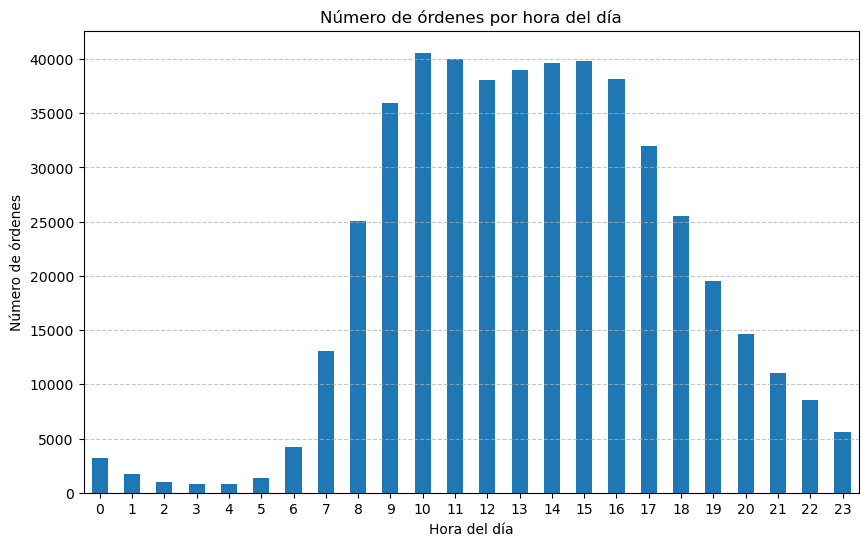

In [73]:
import matplotlib.pyplot as plt

ordenes_por_hora = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ordenes_por_hora.plot(kind='bar')
plt.title('Número de órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribución de órdenes por día de la semana

Se examina la frecuencia de pedidos según el día de la semana. Esta distribución ayuda a identificar los días con mayor demanda en la plataforma y posibles diferencias entre días laborales y fines de semana.

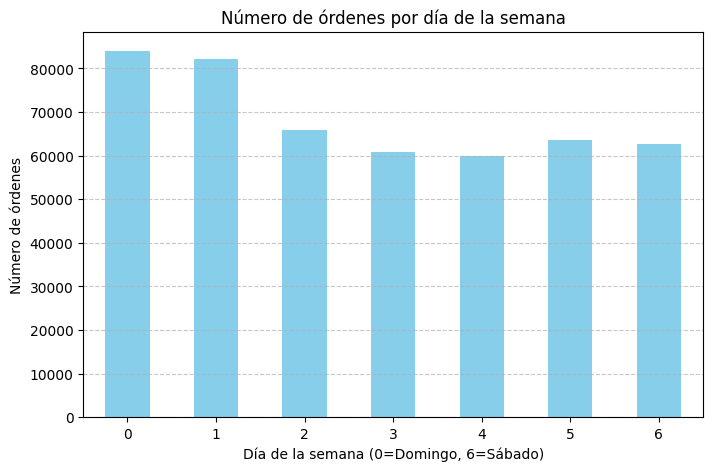

In [58]:
ordenes_por_dia = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ordenes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Número de órdenes por día de la semana')
plt.xlabel('Día de la semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Tiempo de espera entre pedidos

Se visualiza cuántos días transcurren entre un pedido y el siguiente por parte de un mismo cliente. Esto permite identificar hábitos de compra frecuentes, como compras semanales, diarias o esporádicas.

Valor mínimo en 'days_since_prior_order': 0.0
Valor máximo en 'days_since_prior_order': 30.0


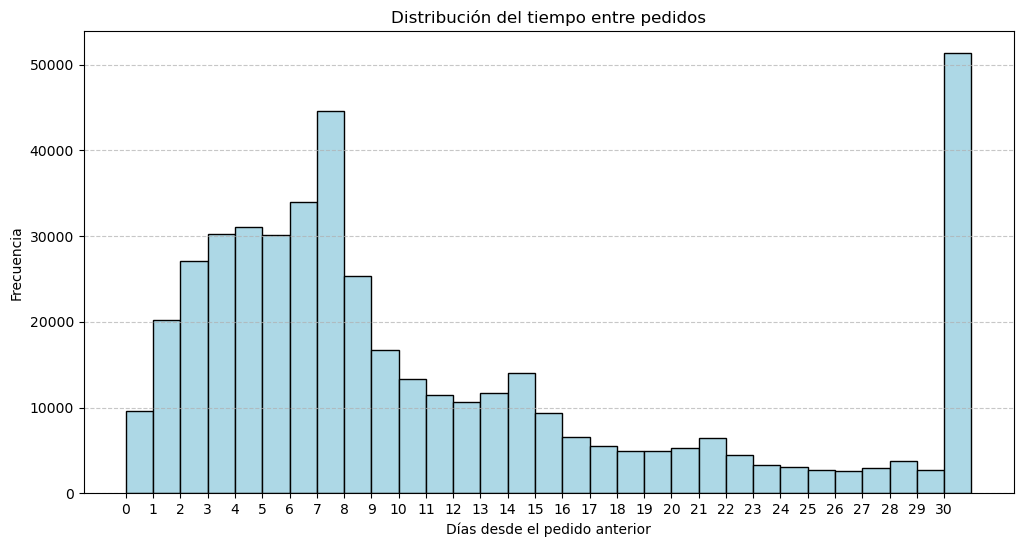

In [76]:
import matplotlib.pyplot as plt

# Limpiar valores nulos
dias = orders['days_since_prior_order'].dropna()

# Obtener min y max limpios
min_days = dias.min()
max_days = dias.max()

print(f"Valor mínimo en 'days_since_prior_order': {min_days}")
print(f"Valor máximo en 'days_since_prior_order': {max_days}")

# Crear histograma con bins enteros
plt.figure(figsize=(12, 6))
plt.hist(dias, bins=range(0, int(max_days)+2), edgecolor='black', color='lightblue')
plt.title('Distribución del tiempo entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, int(max_days)+1))
plt.show()

### Comparación de la distribución horaria entre miércoles y sábado

Se compara el comportamiento de compra en dos días específicos: miércoles (día laboral) y sábado (fin de semana). Esto permite detectar posibles diferencias en horarios de consumo según el contexto del día.

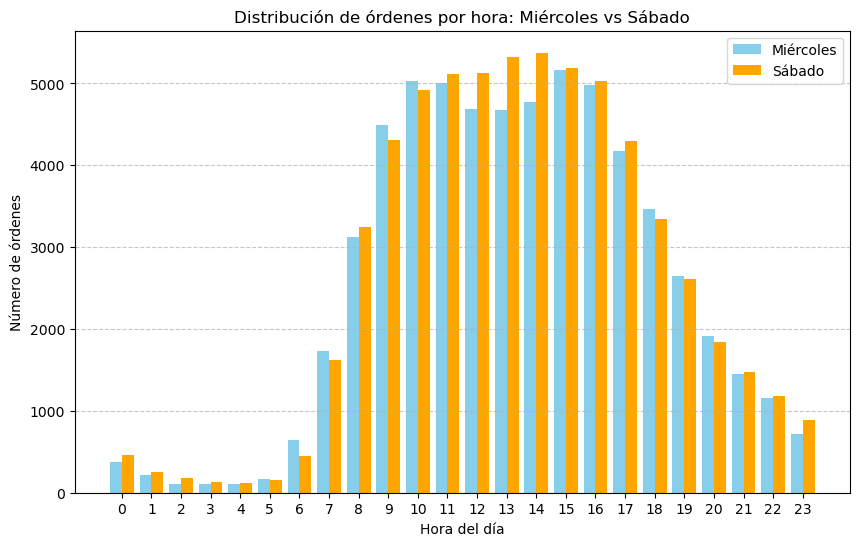

In [81]:
import matplotlib.pyplot as plt

wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day']
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day']

wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts, width=0.4, label='Miércoles', color='skyblue')
plt.bar(saturday_counts.index + 0.2, saturday_counts, width=0.4, label='Sábado', color='orange')
plt.title('Distribución de órdenes por hora: Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Distribución del número de pedidos por cliente

Se analiza cuántos pedidos ha realizado cada cliente. Esta métrica ayuda a diferenciar entre usuarios ocasionales y frecuentes, lo cual puede ser útil para estrategias de fidelización o segmentación.

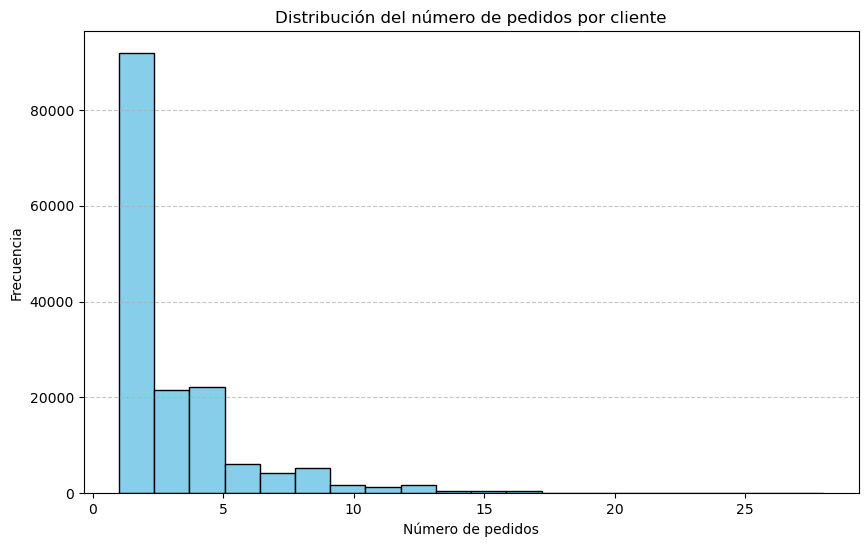

In [84]:
import matplotlib.pyplot as plt

pedidos_por_cliente = orders['user_id'].value_counts()

plt.figure(figsize=(10, 6))
pedidos_por_cliente.plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Productos más populares

Se identifican los productos más comunes en los pedidos. Conocer estos artículos permite enfocar campañas promocionales o asegurar niveles óptimos de inventario.

In [87]:
# Unir tablas de productos con los pedidos
productos_populares = order_products.merge(products, on='product_id')

# Obtener los 20 productos más frecuentes por nombre
conteo_productos = productos_populares['product_name'].value_counts().head(20)

# Filtrar IDs y nombres de esos productos
productos_top_20 = productos_populares[
    productos_populares['product_name'].isin(conteo_productos.index)
][['product_id', 'product_name']].drop_duplicates()

# Mostrar resultados
print("Los 20 productos más populares:")
print(productos_top_20)


Los 20 productos más populares:
      product_id              product_name
21         26209                     Limes
26         13176    Bag of Organic Bananas
27         21903      Organic Baby Spinach
48         47626               Large Lemon
49         47766           Organic Avocado
60          8277  Apple Honeycrisp Organic
76         47209      Organic Hass Avocado
100        24852                    Banana
101        39275       Organic Blueberries
105        28204        Organic Fuji Apple
108        45007          Organic Zucchini
116         5876             Organic Lemon
146        22935      Organic Yellow Onion
229        27845        Organic Whole Milk
237        40706    Organic Grape Tomatoes
279        21137      Organic Strawberries
330        16797              Strawberries
373        27966       Organic Raspberries
611        49683            Cucumber Kirby
1047       24964            Organic Garlic


### Cantidad de productos por pedido

Se mide cuántos artículos contiene un pedido en promedio. Esto proporciona una idea del tamaño típico del carrito de compras de los usuarios.

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


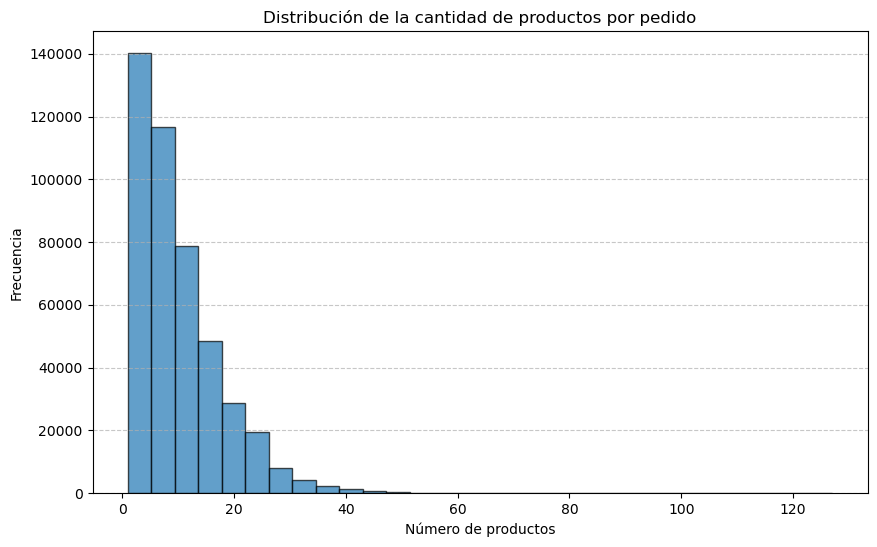

In [92]:
# Agrupar y contar cuántos productos tiene cada pedido
productos_por_pedido = order_products.groupby('order_id')['product_id'].count()

# Resumen estadístico de la distribución
print(productos_por_pedido.describe())

# Visualización de la distribución
plt.figure(figsize=(10, 6))
plt.hist(productos_por_pedido, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la cantidad de productos por pedido')
plt.xlabel('Número de productos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Productos con mayor recurrencia en los pedidos

Se analizan los productos que son reordenados con mayor frecuencia, es decir, aquellos que los clientes vuelven a comprar. Este comportamiento indica lealtad o alta necesidad del producto.

In [95]:
# Filtrar solo los productos que han sido reordenados
productos_reordenados = order_products[order_products['reordered'] == 1]

# Contar la frecuencia de reordenamiento por producto
frecuencia_reordenados = productos_reordenados['product_id'].value_counts().head(20)

# Crear DataFrame con los 20 productos más reordenados
productos_top_reordenados = pd.DataFrame({
    'product_id': frecuencia_reordenados.index,
    'reordered_count': frecuencia_reordenados.values
})

# Añadir los nombres de los productos
productos_top_reordenados = productos_top_reordenados.merge(products, on='product_id', how='left')

# Mostrar resultado final
print(productos_top_reordenados[['product_id', 'product_name', 'reordered_count']])

    product_id              product_name  reordered_count
0        24852                    Banana            55763
1        13176    Bag of Organic Bananas            44450
2        21137      Organic Strawberries            28639
3        21903      Organic Baby Spinach            26233
4        47209      Organic Hass Avocado            23629
5        47766           Organic Avocado            18743
6        27845        Organic Whole Milk            16251
7        47626               Large Lemon            15044
8        27966       Organic Raspberries            14748
9        16797              Strawberries            13945
10       26209                     Limes            13327
11       22935      Organic Yellow Onion            11145
12       24964            Organic Garlic            10411
13       45007          Organic Zucchini            10076
14       49683            Cucumber Kirby             9538
15       28204        Organic Fuji Apple             8989
16        8277

### Proporción de reordenamiento por producto

Se calcula la proporción de veces que cada producto fue reordenado respecto a su total de compras. Esta tasa muestra qué tan propenso es un producto a generar compras repetidas.



In [98]:
# Agrupar por producto y calcular total de pedidos y reordenamientos
product_reorder_rate = order_products.groupby('product_id').agg(
    total_orders=('product_id', 'count'),
    total_reorders=('reordered', 'sum')
)

# Calcular proporción de reordenamiento
product_reorder_rate['reorder_rate'] = product_reorder_rate['total_reorders'] / product_reorder_rate['total_orders']

# Ordenar y seleccionar los 20 con mayor proporción
product_reorder_rate_sorted = product_reorder_rate.sort_values(by='reorder_rate', ascending=False)
top_reorder_rate_products = product_reorder_rate_sorted.head(20).reset_index()

# Agregar nombres de productos
top_reorder_rate_products = top_reorder_rate_products.merge(products, on='product_id')[
    ['product_id', 'product_name', 'reorder_rate']
]

# Mostrar resultados
print(top_reorder_rate_products)

    product_id                                       product_name  \
0        14721                            Bone Strength Take Care   
1        20949                           Vanilla Sandwich Cookies   
2         6723                                   Palmiers- Petite   
3         6732                  Naturally Sparkling Mineral Water   
4        45088  California Dill Pollen & Garlic Goat Cheese & ...   
5        45078                                       Pomegranatea   
6        21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
7        21005                        Peanut Butter Pie Ice Cream   
8        35192                         Chocolate Soy Milk Singles   
9        35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
10        6810                        Raspberry Goji Paleo Prints   
11       45040                                 Head Lock Mega Gel   
12       45035                               Coffee Flavor Yogurt   
13       27373                    

### Proporción de productos repetidos por cliente

Se calcula, para cada cliente, la proporción de productos que ya había adquirido anteriormente. Esta métrica refleja el nivel de repetición en los hábitos de consumo individuales.

In [105]:
# Unir orden con usuario
order_products_users = order_products.merge(orders[['order_id', 'user_id']], on='order_id', how='left')

# Marcar productos repetidos
order_products_users['is_reorder'] = order_products_users['reordered'] == 1

# Calcular proporción por usuario
proporciones_repetidas = order_products_users.groupby('user_id').agg(
    total_productos=('product_id', 'count'),
    productos_repetidos=('is_reorder', 'sum')
)

proporciones_repetidas['repeat_ratio'] = proporciones_repetidas['productos_repetidos'] / proporciones_repetidas['total_productos']

# Mostrar resultados
print(proporciones_repetidas.head())
print(proporciones_repetidas['repeat_ratio'].describe())

         total_productos  productos_repetidos  repeat_ratio
user_id                                                    
2                     26                    1      0.038462
4                      2                    0      0.000000
5                     12                    8      0.666667
6                      4                    0      0.000000
7                     14                   13      0.928571
count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: repeat_ratio, dtype: float64


### Primer producto agregado al carrito

Se identifican los productos que con mayor frecuencia fueron añadidos en primer lugar al carrito. Esto puede reflejar artículos prioritarios o de alta urgencia para el cliente.

In [115]:
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]
productos_primeros = primeros_productos['product_id'].value_counts().head(20)

productos_primeros_con_nombres = productos_primeros.reset_index()
productos_primeros_con_nombres.columns = ['product_id', 'count']

productos_primeros_con_nombres = productos_primeros_con_nombres.merge(
    products[['product_id', 'product_name']], on='product_id', how='left'
)

print(productos_primeros_con_nombres)


    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          